In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import svm
from itertools import combinations
import warnings
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [2]:
app = pd.read_csv('application_record.csv')
cred = pd.read_csv('credit_record.csv')

In [3]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
cred.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
merge = pd.merge(cred,app,on = "ID" , how = "inner")
merge.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [6]:
np.random.seed(1234)

merge.rename(columns={'NAME_FAMILY_STATUS': 'IsMarried'}, inplace=True)
train, test = train_test_split(merge, test_size=0.2)

def prep_data(data):
    df = data.copy()
    df = df.dropna()

    sentiment_mapping = {'X': 1, '0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, 'C': 1}
    df['STATUS'] = df['STATUS'].map(sentiment_mapping)

    le = LabelEncoder()
    df["CODE_GENDER"] = le.fit_transform(df["CODE_GENDER"])
    df["FLAG_OWN_CAR"] = le.fit_transform(df["FLAG_OWN_CAR"])
    df["FLAG_OWN_REALTY"] = le.fit_transform(df["FLAG_OWN_REALTY"])

    maps = {'Academic degree': 4, 'Higher education': 4, 'Incomplete higher': 3, 'Secondary / secondary special': 2, 'Lower secondary': 1}
    df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].map(maps)

    maps2 = {'Married': 1, 'Single / not married': 0, 'Civil marriage': 1, 'Separated': 0, 'Widow': 0}
    df['IsMarried'] = df['IsMarried'].map(maps2)
    
    maps3 = {'Working': 1, 'Commercial associate': 1, 'State servant': 1, 'Pensioner': 1, 'Student': 0}
    df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].map(maps3)

    x = df.drop(["NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "ID","STATUS"], axis=1)
    y = df["STATUS"]
    
    return x, y

x_train, y_train = prep_data(train)
x_test,y_test = prep_data(test)

In [7]:
x_test.head()

,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,IsMarried,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
99062,-51,0,0,1,0,247500.0,1,2,1,-16340,-8647,1,0,0,0,2.0
730461,-23,0,0,1,1,121500.0,1,4,1,-11981,-2965,1,1,0,0,3.0
527997,-25,0,0,1,1,90000.0,1,2,0,-12037,-2706,1,0,0,0,2.0
18953,-7,1,1,1,0,360000.0,1,4,1,-19958,-7465,1,0,0,0,2.0
423587,-2,0,1,0,0,180000.0,1,2,1,-18341,-5574,1,1,1,0,2.0


In [8]:
variance_filter = VarianceThreshold()
variance_filter.fit(x_train)
non_constant_features = variance_filter.get_support(indices=True)
x_train = x_train.iloc[:, non_constant_features]

In [9]:
selector = SelectKBest(score_func=f_classif, k=10)

X_new = selector.fit_transform(x_train, y_train)

mask = selector.get_support()
new_features = []

for bool, feature in zip(mask, x_train.columns):
    if bool:
        new_features.append(feature)

print('The best features are: ', new_features)

The best features are:  ['MONTHS_BALANCE', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'IsMarried', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_EMAIL']


In [10]:
cols= new_features
x_train = x_train[cols]
x_test = x_test[cols]

### Logistic Regression

In [11]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

score_pred = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % score_pred)

Accuracy: 0.613943


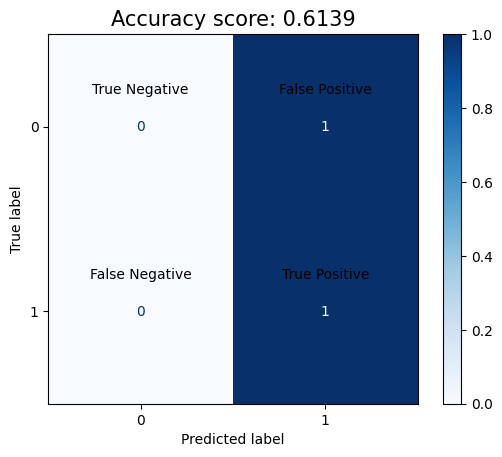

In [12]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
labels = unique_labels(y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots()
cm_display.plot(ax=ax, cmap='Blues')

y_positions = [-.2, -.2, .8, .8]
x_positions = [0, 1, 0, 1]
texts = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

for x, y, text in zip(x_positions, y_positions, texts):
    ax.text(x, y, text, va='center', ha='center', color='black', fontsize=10)

plt.title(f"Accuracy score: {score_pred.round(4)}", size = 15)
plt.show()

### Random Forest

In [13]:
forest = RandomForestClassifier()

forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

score_pred = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % score_pred)

Accuracy: 0.708812


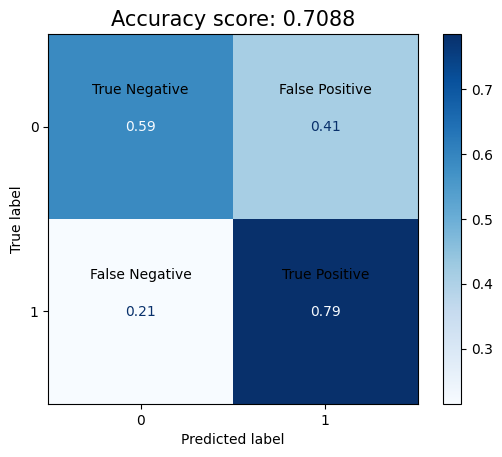

In [14]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
labels = unique_labels(y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots()
cm_display.plot(ax=ax, cmap='Blues')

y_positions = [-.2, -.2, .8, .8]
x_positions = [0, 1, 0, 1]
texts = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

for x, y, text in zip(x_positions, y_positions, texts):
    ax.text(x, y, text, va='center', ha='center', color='black', fontsize=10)

plt.title(f"Accuracy score: {score_pred.round(4)}", size = 15)
plt.show()

### Gaussian Naive Bayes

In [15]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
y_pred = nb_classifier.predict(x_test)

score_pred = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % score_pred)

Accuracy: 0.625334


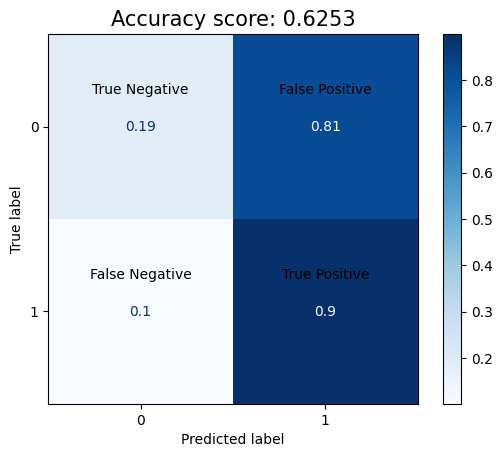

In [16]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
labels = unique_labels(y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots()
cm_display.plot(ax=ax, cmap='Blues')

y_positions = [-.2, -.2, .8, .8]
x_positions = [0, 1, 0, 1]
texts = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

for x, y, text in zip(x_positions, y_positions, texts):
    ax.text(x, y, text, va='center', ha='center', color='black', fontsize=10)

plt.title(f"Accuracy score: {score_pred.round(4)}", size = 15)
plt.show()

### XG Boost

In [17]:
xgb_model = xgb.XGBClassifier()

xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

score_pred = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % score_pred)

Accuracy: 0.701423


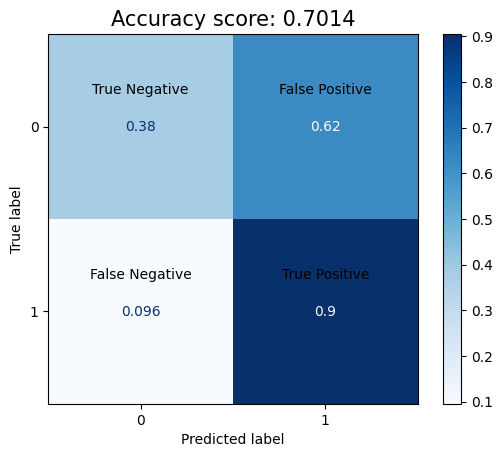

In [18]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
labels = unique_labels(y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots()
cm_display.plot(ax=ax, cmap='Blues')

y_positions = [-.2, -.2, .8, .8]
x_positions = [0, 1, 0, 1]
texts = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

for x, y, text in zip(x_positions, y_positions, texts):
    ax.text(x, y, text, va='center', ha='center', color='black', fontsize=10)

plt.title(f"Accuracy score: {score_pred.round(4)}", size = 15)
plt.show()

### K-Nearest Neighbors

In [24]:
# Normalize Data for KNN

scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

In [26]:
knn = KNeighborsClassifier()
knn.fit(x_train_normalized, y_train)
y_pred = knn.predict(x_test_normalized)

score_pred = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % score_pred)

Accuracy: 0.713828


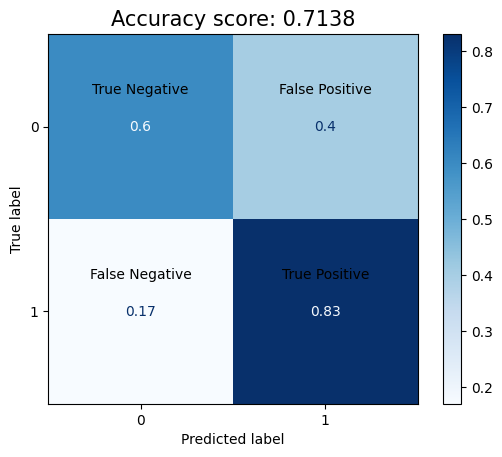

In [28]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
labels = unique_labels(y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots()
cm_display.plot(ax=ax, cmap='Blues')

y_positions = [-.2, -.2, .8, .8]
x_positions = [0, 1, 0, 1]
texts = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

for x, y, text in zip(x_positions, y_positions, texts):
    ax.text(x, y, text, va='center', ha='center', color='black', fontsize=10)

plt.title(f"Accuracy score: {score_pred.round(4)}", size = 15)
plt.show()

#### KNN Hyperparameter Optimization

In [27]:
hyperparameters = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan'] 
}

scoring = 'accuracy'

param_grid = hyperparameters

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring=scoring)
grid_search.fit(x_train_normalized, y_train)

best_params = grid_search.best_params_

knn = KNeighborsClassifier(**best_params)
knn.fit(x_train_normalized, y_train)
y_pred = knn.predict(x_test_normalized)
accuracy = accuracy_score(y_test, y_pred)

print("Best hyperparameters:", best_params)
print("Test set accuracy:", accuracy)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9}
Test set accuracy: 0.7409099792467404


Best hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9}

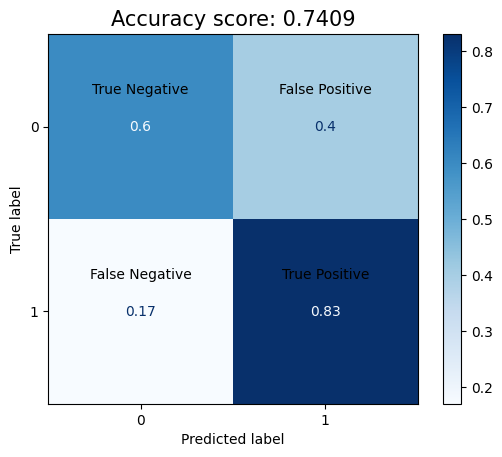

In [30]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
labels = unique_labels(y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots()
cm_display.plot(ax=ax, cmap='Blues')

y_positions = [-.2, -.2, .8, .8]
x_positions = [0, 1, 0, 1]
texts = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

for x, y, text in zip(x_positions, y_positions, texts):
    ax.text(x, y, text, va='center', ha='center', color='black', fontsize=10)

plt.title(f"Accuracy score: {accuracy.round(4)}", size = 15)
plt.show()

The best model we arrived on for classification was a KNN model using Manhattan distance and 9 neighbors. It resulted in an accuracy of approximately 0.741